## How does book length effect average ratings?
#### By genre? word count vs page count different?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

books_df = pd.read_csv('books_genre.csv')

In [27]:
books_df.info()
books_df.describe()
books_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 10214 entries, 0 to 11126
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Book Id             10214 non-null  int64  
 1   Title               10214 non-null  object 
 2   Author              10214 non-null  object 
 3   average_rating      10214 non-null  float64
 4   isbn                10214 non-null  object 
 5   isbn13              10214 non-null  int64  
 6   language_code       10214 non-null  object 
 7   num_pages           10214 non-null  int64  
 8   ratings_count       10214 non-null  int64  
 9   text_reviews_count  10214 non-null  int64  
 10  publication_date    10214 non-null  object 
 11  publisher           10214 non-null  object 
 12  genres              10214 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 1.1+ MB


,Book Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genres
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,Fantasy;Young Adult;Fiction;Fantasy
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,Fantasy;Young Adult;Fiction;Fantasy
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,Fantasy;Fiction;Young Adult;Fantasy
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,Fantasy;Fiction;Young Adult;Fantasy
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books,Fiction


#### Clean data

In [3]:
# print null values for each column
print(books_df.isnull().sum())

Book Id                0
Title                  0
Author                 0
average_rating         0
isbn                   0
isbn13                 0
language_code          0
num_pages              0
ratings_count          0
text_reviews_count     0
publication_date       0
publisher              0
genres                97
dtype: int64


In [2]:
# remove books where genre is null
books_df = books_df.dropna(subset=['genres'])

In [5]:
print(books_df.isnull().sum())

Book Id               0
Title                 0
Author                0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
genres                0
dtype: int64


In [6]:
# How many books are not rated? (average_rating is 0.0)
books_df[books_df['average_rating'] == 0.0].shape[0]


15

In [3]:
# remove books rated as 0.0
books_df = books_df[books_df['average_rating'] > 0.0]
books_df[books_df['average_rating'] == 0.0].shape[0]

0

In [8]:
# How many duplicate book titles are there?
print(books_df.Title.duplicated().sum())

773


In [4]:
# remove duplicates based on title and authors
books_df.drop_duplicates(subset='Title', keep='first', inplace=True)
print(books_df.Title.duplicated().sum())

0


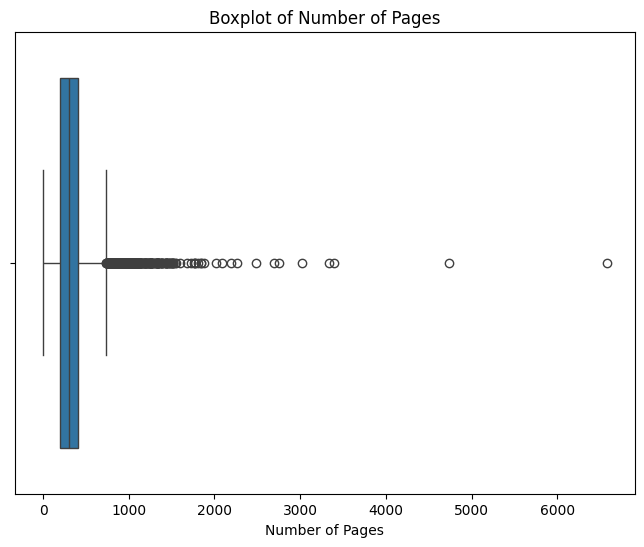

In [10]:
# boxplot of num_pages to check for outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=books_df['num_pages'])
plt.title('Boxplot of Number of Pages')
plt.xlabel('Number of Pages')
plt.show()

In [6]:
# create new dataframe for books greater than 1000 pages
long_books = books_df[books_df['num_pages'] > 1500]

# print the tile and page number of these books
for index, row in long_books.iterrows():
    print(f"{row['Title']}: {row['num_pages']} pages")

Harry Potter Boxed Set  Books 1-5 (Harry Potter  #1-5): 2690 pages
Harry Potter Collection (Harry Potter  #1-6): 3342 pages
J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings: 1728 pages
The Iliad/The Odyssey: 1556 pages
The Complete Pelican Shakespeare: 1808 pages
The History of the Lord of the Rings (The History of Middle-earth #6-9): 1680 pages
The Complete Anne of Green Gables Boxed Set (Anne of Green Gables  #1-8): 2088 pages
The New Annotated Sherlock Holmes: The Complete Short Stories: 1878 pages
Plato: Complete Works: 1838 pages
Rabbit Angstrom: The Four Novels: 1520 pages
The Lord of the Rings / The Hobbit: 1600 pages
The Collected Letters of C.S. Lewis  Volume 3: Narnia  Cambridge  and Joy  1950 - 1963: 1840 pages
The Norton Anthology of Short Fiction: 1776 pages
The Complete Works: The Revised Oxford Translation  Vol. 1: 1757 pages
Literary Criticism  Vol. 1: Essays on Literature / American Writers / English Writers: 1504 pages
Study Bible: NIV: 2198 pages

In [5]:
# since most books over 1500 pages are collections or encyclopedias, we will remove them
books_df = books_df[books_df['num_pages'] <= 1500]

In [6]:
books_df.describe()

,Book Id,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,10214.000000,10214.000000,1.021400e+04,10214.000000,1.021400e+04,10214.000000
mean,21390.153613,3.941608,9.761673e+12,329.497650,1.736014e+04,535.330625
std,13077.694571,0.293439,4.235895e+11,207.241815,1.082649e+05,2516.081141
min,1.000000,2.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10416.250000,3.770000,9.780345e+12,195.000000,1.140000e+02,9.000000
50%,20651.500000,3.960000,9.780575e+12,296.500000,8.300000e+02,49.000000
75%,32101.250000,4.140000,9.780872e+12,409.750000,5.422750e+03,249.000000
max,45641.000000,5.000000,9.790008e+12,1500.000000,4.597666e+06,94265.000000


In [7]:
sep_genres = books_df["genres"]=books_df["genres"].apply(lambda x: ';'.join( x.split(';')[:4] ).split(",")[0] )

# Find the largest number of genres for a book?
max_genres = sep_genres.apply(lambda x: len(x.split(';'))).max()

genres_df = books_df.copy()
# Split genres into separate columns and save into new df
for i in range(max_genres):
    genres_df[f'genre_{i+1}'] = sep_genres.apply(lambda x: x.split(';')[i] if len(x.split(';')) > i else np.nan)
genres_df = genres_df.drop(columns=['genres'])
genres_df.head()

,Book Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genre_1,genre_2,genre_3,genre_4
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,Fantasy,Young Adult,Fiction,Fantasy
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,Fantasy,Young Adult,Fiction,Fantasy
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,Fantasy,Fiction,Young Adult,Fantasy
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,Fantasy,Fiction,Young Adult,Fantasy
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books,Fiction,NaN,NaN,NaN


## Explore Data and find what might affect the ratings? what makes them higher or lower?

Text(0, 0.5, 'Frequency')

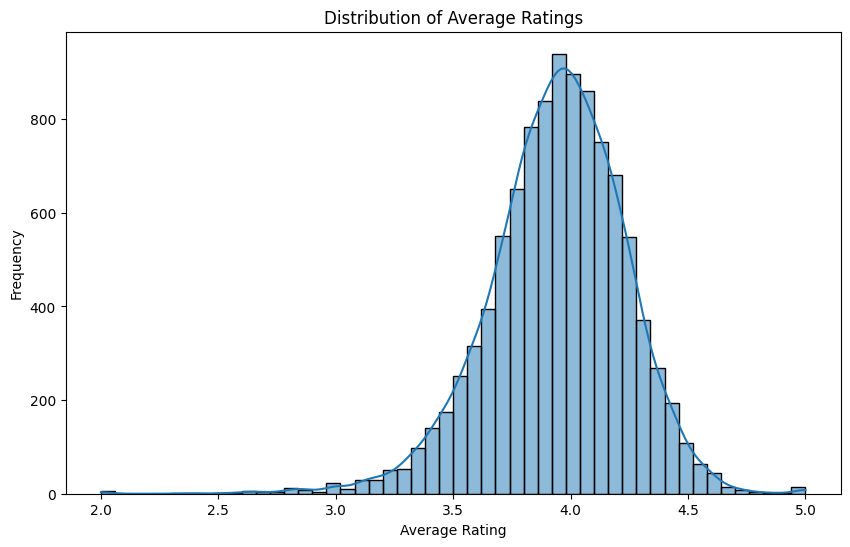

In [15]:
# plot for average_rating
plt.figure(figsize=(10, 6))
sns.histplot(books_df['average_rating'], bins=50, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

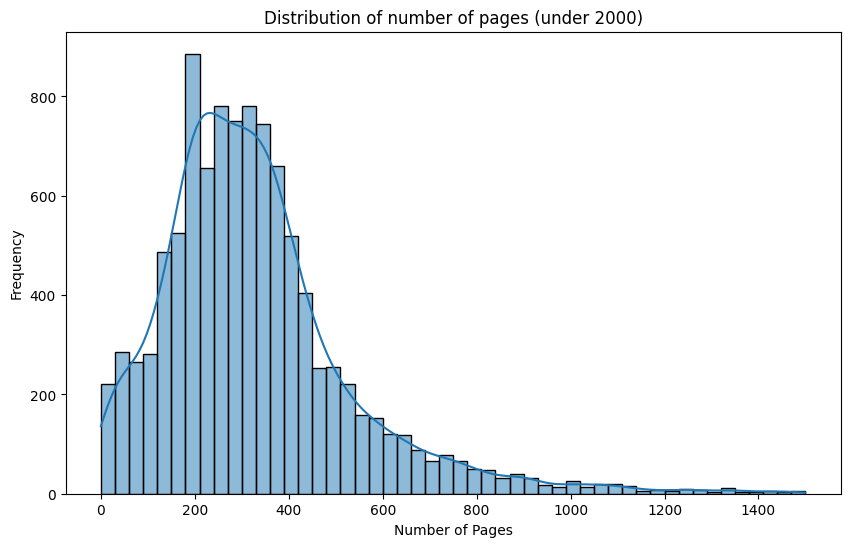

In [16]:
# remove books with over 2000 pages for better visualization
books_df_filtered = books_df[books_df['num_pages'] <= 2000]

plt.figure(figsize=(10, 6))
sns.histplot(books_df_filtered['num_pages'], bins=50, kde=True)
plt.title('Distribution of number of pages (under 2000)')
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')

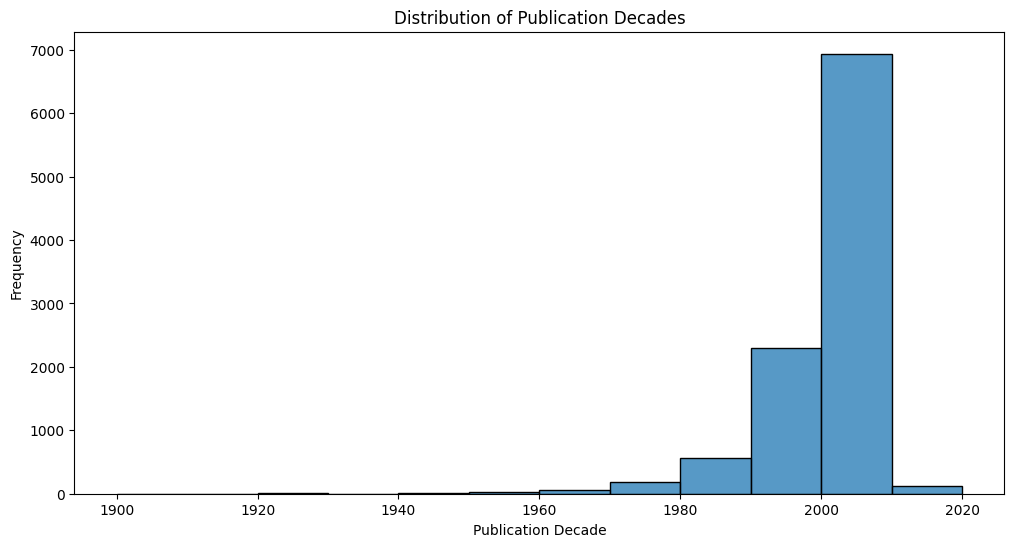

In [36]:
pud_date_df = books_df.copy()
pud_date_df['publication_date'] = pd.to_datetime(pud_date_df['publication_date'], format='%m/%d/%Y', errors='coerce')

# Extract year
pud_date_df['year'] = pud_date_df['publication_date'].dt.year

# Drop rows with non-finite 'year' values
pud_date_df = pud_date_df.dropna(subset=['year'])

# Convert 'year' to integer using .loc
pud_date_df.loc[:, 'year'] = pud_date_df['year'].astype(int)

# bin books by decade
pud_date_df['decade'] = (pud_date_df['year'] // 10) * 10
# visualize publication decade distribution
plt.figure(figsize=(12, 6))
sns.histplot(pud_date_df['decade'], bins=range(1900, 2030, 10), kde=False)
plt.title('Distribution of Publication Decades')
plt.xlabel('Publication Decade')
plt.ylabel('Frequency')
plt.show()

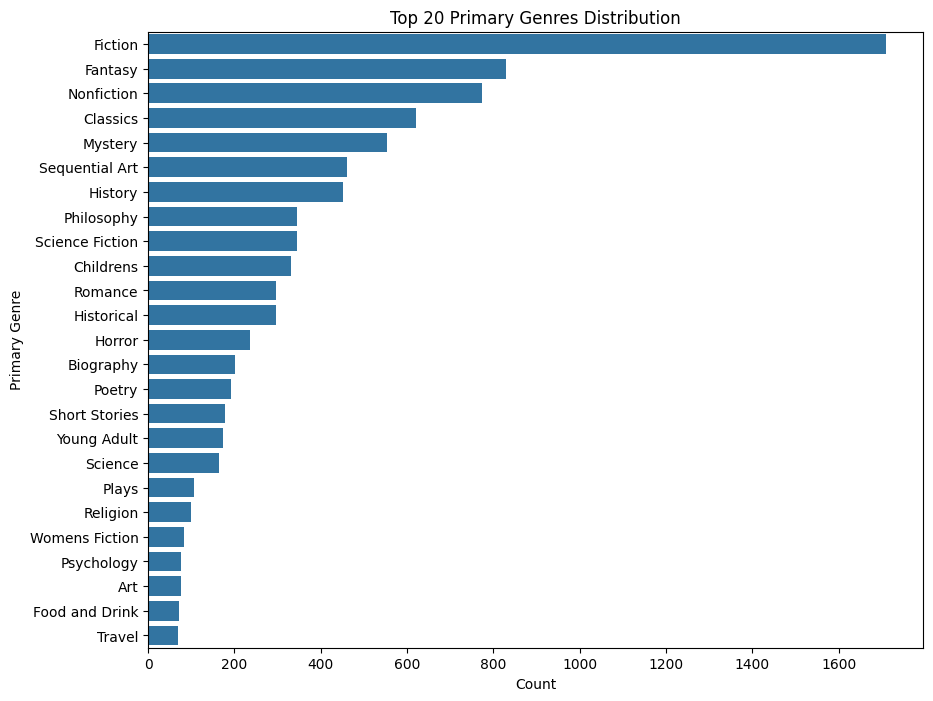

In [37]:
# graph primary genre distribution of top 20 genres
plt.figure(figsize=(10, 8))
sns.countplot(y=genres_df['genre_1'], order=genres_df['genre_1'].value_counts().index[:25])
plt.title('Top 20 Primary Genres Distribution')
plt.xlabel('Count')
plt.ylabel('Primary Genre')
plt.show()

In [22]:
# total genre distribution
genre1_counts = genres_df['genre_1'].value_counts()
genre2_counts = genres_df['genre_2'].value_counts()
genre3_counts = genres_df['genre_3'].value_counts()
genre4_counts = genres_df['genre_4'].value_counts()
# Combine counts so a genre that appears as either first or second is counted together
combined = genre1_counts.add(genre2_counts, fill_value=0).add(genre3_counts, fill_value=0).add(genre4_counts, fill_value=0).sort_values(ascending=False)

In [36]:
# how many unique genres are there?
unique_genres = combined.index.tolist()
print(f'There are {len(unique_genres)} unique genres in the dataset.')

# how many unique genres with at least 5 books?
genres_with_min_5 = combined[combined >= 5]
print(f'There are {len(genres_with_min_5)} unique genres with at least 5 books in the dataset.')

There are 250 unique genres in the dataset.
There are 132 unique genres with at least 5 books in the dataset.


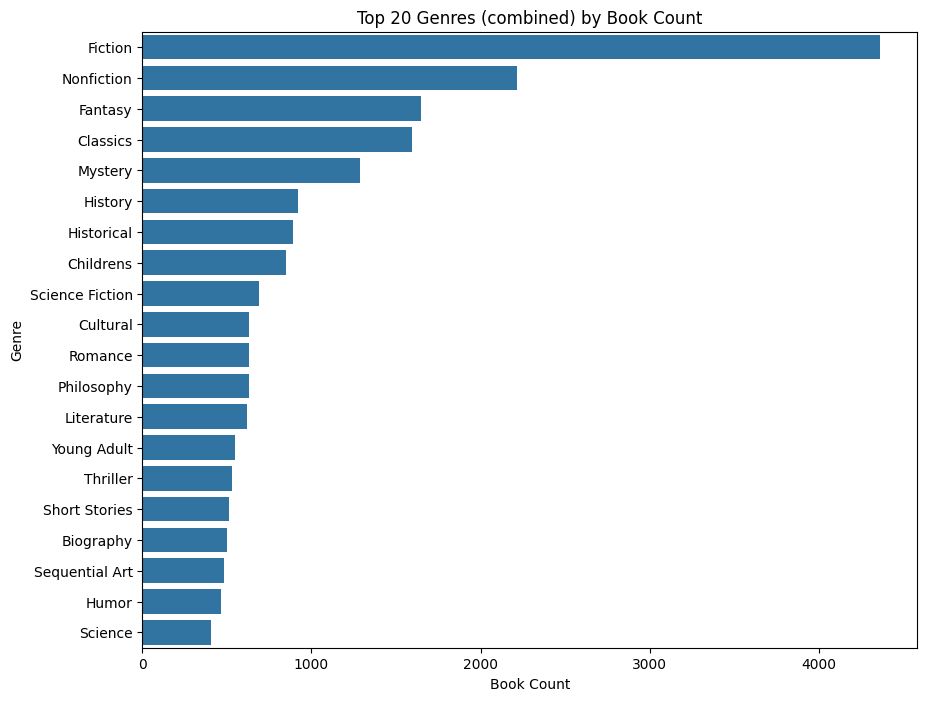

In [40]:
# graph top 20 genres
plt.figure(figsize=(10, 8))
sns.barplot(y=combined.index[:20], x=combined.values[:20])
plt.title('Top 20 Genres (combined) by Book Count')
plt.xlabel('Book Count')
plt.ylabel('Genre')
plt.show()

In [10]:
# Save top 20 genres to d dataframe
top_20_genres = combined.head(20)

avg_rating_genre = {}
avg_pages_genre = {}
ratings_count_by_genre = {}
for genre in top_20_genres.index:
    # find average rating by genre (combined)
    genre_books = genres_df[
        (genres_df['genre_1'] == genre) |
        (genres_df['genre_2'] == genre) |
        (genres_df['genre_3'] == genre) |
        (genres_df['genre_4'] == genre)
    ]
    avg_rating_genre[genre] = genre_books['average_rating'].mean()
    avg_pages_genre[genre] = genre_books['num_pages'].mean()
    ratings_count_by_genre[genre] = genre_books['ratings_count'].count()
avg_rating_genre_df = pd.DataFrame.from_dict(avg_rating_genre, orient='index', columns=['average_rating'])
avg_pages_genre_df = pd.DataFrame.from_dict(avg_pages_genre, orient='index', columns=['average_num_pages'])
ratings_count_by_genre_df = pd.DataFrame.from_dict(ratings_count_by_genre, orient='index', columns=['ratings_count'])

avg_genre_stats = pd.concat([avg_rating_genre_df, avg_pages_genre_df, ratings_count_by_genre_df], axis=1)
avg_genre_stats = avg_genre_stats.sort_values(by='average_rating', ascending=False)
avg_genre_stats


,average_rating,average_num_pages,ratings_count
Sequential Art,4.126619,197.482474,485
Science,4.022095,364.885714,315
Biography,4.015288,396.300412,486
Childrens,4.006342,141.455752,678
Classics,3.991162,353.782663,1592
Nonfiction,3.988381,342.678845,2217
Philosophy,3.985758,326.789562,594
History,3.979863,399.492009,876
Fantasy,3.967439,361.041451,1351
Short Stories,3.958235,327.249020,510


In [52]:
# How many different authors? 
print(f"Number of unique authors: {books_df['Author'].nunique()}")
# how many different publishers?
print(f"Number of unique publishers: {books_df['publisher'].nunique()}")

Number of unique authors: 6204
Number of unique publishers: 2147


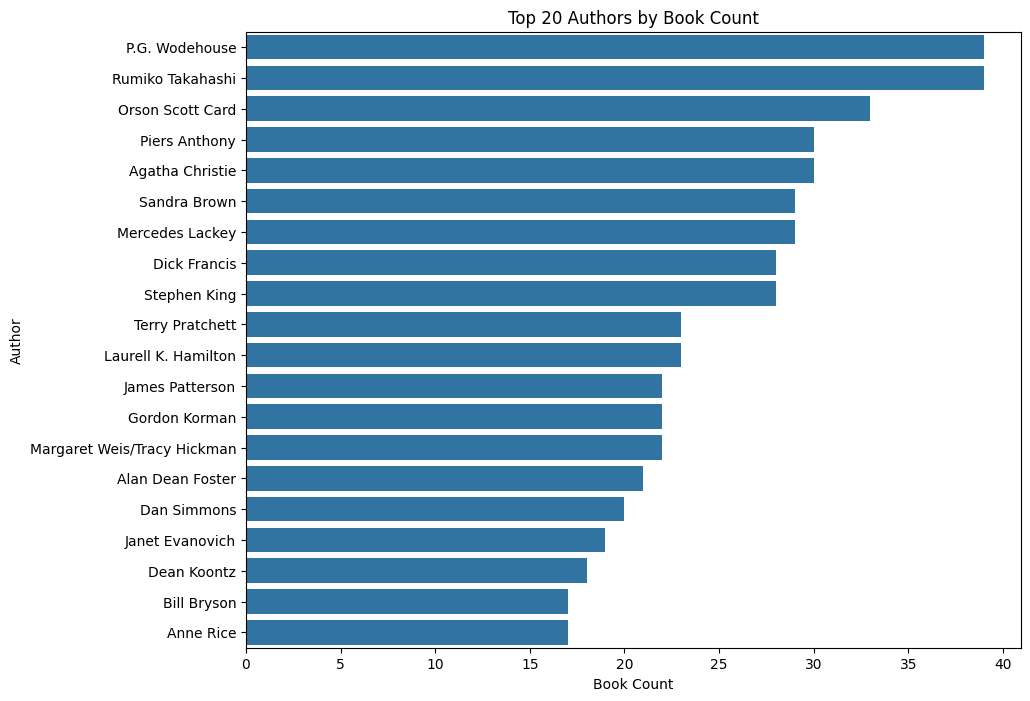

In [59]:
# analyze top 20 authors by book count
top_authors = books_df['Author'].value_counts().head(20)
plt.figure(figsize=(10, 8))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 20 Authors by Book Count')
plt.xlabel('Book Count')
plt.ylabel('Author')
plt.show()

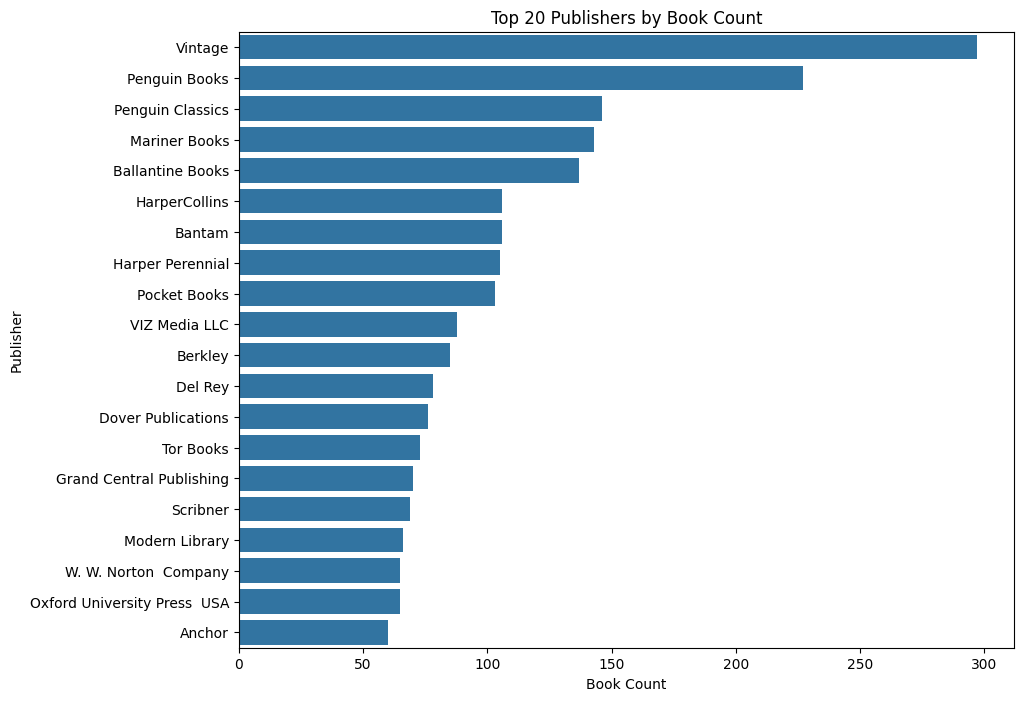

In [12]:
# analyze top 20 publishers by book count
top_publishers = books_df['publisher'].value_counts().head(20)
plt.figure(figsize=(10, 8))
sns.barplot(y=top_publishers.index, x=top_publishers.values)
plt.title('Top 20 Publishers by Book Count')
plt.xlabel('Book Count')
plt.ylabel('Publisher')
plt.show()

In [13]:
# how many books per publisher? Top genres for each publisher?
publisher_genre_stats = {}
for publisher in top_publishers.index:
    publisher_books = genres_df[genres_df['publisher'] == publisher]
    genre_counts = {}
    for genre in top_20_genres.index:
        genre_count = publisher_books[
            (publisher_books['genre_1'] == genre)
        ].shape[0]
        genre_counts[genre] = genre_count
    publisher_genre_stats[publisher] = genre_counts
publisher_genre_df = pd.DataFrame.from_dict(publisher_genre_stats, orient='index')
publisher_genre_df = publisher_genre_df.fillna(0).astype(int)
publisher_genre_df.head()

,Fiction,Nonfiction,Fantasy,Classics,Mystery,History,Historical,Childrens,Science Fiction,Cultural,Romance,Philosophy,Literature,Young Adult,Thriller,Short Stories,Biography,Sequential Art,Humor,Science
Vintage,136,22,0,6,7,22,9,0,2,8,0,8,0,0,0,27,8,0,1,3
Penguin Books,68,19,5,33,4,20,6,0,2,2,0,12,0,0,0,9,6,1,1,3
Penguin Classics,29,3,3,59,0,7,4,0,0,3,0,17,0,0,0,5,0,0,0,1
Mariner Books,45,26,1,3,9,7,3,0,3,0,0,0,0,0,0,9,8,0,0,3
Ballantine Books,52,11,5,1,6,5,11,0,7,0,4,1,0,0,0,0,1,1,0,3


##### What is the ideal book length of top 20 genre?

In [48]:
top_genres = combined.head(20).index.tolist()

df_expl = genres_df[
    ['Title','num_pages','average_rating','ratings_count','text_reviews_count','genre_1','genre_2','genre_3','genre_4']
].melt(
    id_vars=['Title','num_pages','average_rating','ratings_count','text_reviews_count'],
    value_vars=['genre_1','genre_2','genre_3','genre_4'],
    value_name='genre'
).dropna(subset=['genre'])
df_expl['genre'] = df_expl['genre'].astype(str).str.strip()

# find best binned page range per genre using ratings_count-weighted mean rating
bins = np.linspace(20, 1500, 40)  # adjustable
results = []
min_support = 5

def weighted_rating(group):
    total_weights = group['ratings_count'].sum()
    if total_weights > 0:
        return (group['average_rating'] * group['ratings_count']).sum() / total_weights
    return group['average_rating'].mean()

for g in top_genres:
    sub = df_expl[df_expl['genre'] == g].copy()
    if len(sub) < min_support:
        continue

    sub['page_bin'] = pd.cut(sub['num_pages'], bins, include_lowest=True)
    grouped = sub.groupby('page_bin').apply(lambda gg: pd.Series({
        'weighted_mean_rating': weighted_rating(gg),
        'count': len(gg)
    })).reset_index()

    grouped = grouped[grouped['count'] >= min_support]

    if grouped.empty or grouped['weighted_mean_rating'].dropna().empty:
        continue

    best_idx = grouped['weighted_mean_rating'].idxmax()
    best = grouped.loc[best_idx]    
    
    interval = best['page_bin']
    left = int(interval.left) if pd.notna(interval.left) else None
    right = int(interval.right) if pd.notna(interval.right) else None

    results.append({
        'genre': g,
        'ideal_page_range': f'{left}-{right}' if left is not None and right is not None else None,
        'mean_rating_in_range': float(best['weighted_mean_rating']),
        'books_in_range': int(best['count']),
        'total_books_genre': int(len(sub))
    })

ideal_df = pd.DataFrame(results).sort_values('total_books_genre', ascending=False).reset_index(drop=True)
print("\nSuggested ideal page ranges (primary + secondary):")
print(ideal_df)

C:\Users\noamh\AppData\Local\Temp\ipykernel_13156\728447153.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = sub.groupby('page_bin').apply(lambda gg: pd.Series({
C:\Users\noamh\AppData\Local\Temp\ipykernel_13156\728447153.py:29: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = sub.groupby('page_bin').apply(lambda gg: pd.Series({
C:\Users\noamh\AppData\Local\Temp\ipykernel_13156\728447153.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future 


Suggested ideal page ranges (primary + secondary):
              genre ideal_page_range  mean_rating_in_range  books_in_range  \
0           Fiction          854-892              4.399824              22   
1        Nonfiction          892-930              4.268063               9   
2           Fantasy          627-665              4.461124              30   
3          Classics        1082-1120              4.495861               6   
4           Mystery          816-854              4.153567               7   
5           History            19-57              4.363851              12   
6        Historical          551-589              4.325821              30   
7         Childrens            19-57              4.239552             225   
8   Science Fiction          778-816              4.296229               8   
9          Cultural          551-589              4.190548              15   
10          Romance          665-703              4.247291               5   
11       Phi

## Book Recommendation System

In [ ]:
# write python script that has you choose from the options below to get book recommendations, then takes user inputs and outputs 10 recommended books based on the chosen criteria.
# -------------------------------------------------------

# Recommend by Author

# Recommenend by genre

# Recommend based on another book title

# recommend based on book features (num_pages, average_rating, ratings_count)

# some combination of the above

In [9]:
genres_df.head()

,Book Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genre_1,genre_2,genre_3,genre_4
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,Fantasy,Young Adult,Fiction,Fantasy
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,Fantasy,Young Adult,Fiction,Fantasy
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,Fantasy,Fiction,Young Adult,Fantasy
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,Fantasy,Fiction,Young Adult,Fantasy
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books,Fiction,NaN,NaN,NaN


### preprocess data for recommendation system


In [20]:
# remove unnecessary columns and save cleaned dataframe
features_df = genres_df.drop(columns=['Title', 'Author', 'isbn', 'isbn13', 'publisher'])
features_df.head()

,Book Id,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,genre_1,genre_2,genre_3,genre_4
0,1,4.57,eng,652,2095690,27591,9/16/2006,Fantasy,Young Adult,Fiction,Fantasy
1,2,4.49,eng,870,2153167,29221,9/1/2004,Fantasy,Young Adult,Fiction,Fantasy
2,4,4.42,eng,352,6333,244,11/1/2003,Fantasy,Fiction,Young Adult,Fantasy
3,5,4.56,eng,435,2339585,36325,5/1/2004,Fantasy,Fiction,Young Adult,Fantasy
5,9,3.74,en-US,152,19,1,4/26/2005,Fiction,NaN,NaN,NaN


In [21]:
# adjust publication date to year only
features_df['publication_date'] = pd.to_datetime(features_df['publication_date'], format='%m/%d/%Y', errors='coerce')
features_df['publication_date'] = features_df['publication_date'].dt.year.astype('Int64')
features_df.head()

,Book Id,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,genre_1,genre_2,genre_3,genre_4
0,1,4.57,eng,652,2095690,27591,2006,Fantasy,Young Adult,Fiction,Fantasy
1,2,4.49,eng,870,2153167,29221,2004,Fantasy,Young Adult,Fiction,Fantasy
2,4,4.42,eng,352,6333,244,2003,Fantasy,Fiction,Young Adult,Fantasy
3,5,4.56,eng,435,2339585,36325,2004,Fantasy,Fiction,Young Adult,Fantasy
5,9,3.74,en-US,152,19,1,2005,Fiction,NaN,NaN,NaN


In [46]:
# Prepare Genre Features for Modeling
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.cluster import KMeans, DBSCAN, Birch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, silhouette_score, davies_bouldin_score

In [26]:
df_preprocess = features_df.copy()
# build list of genres per row (dedupe per book)
genre_cols = ['genre_1','genre_2','genre_3','genre_4']
df_preprocess['genre_list'] = (df_preprocess[genre_cols]
                    .apply(lambda r: [g.strip() for g in r.dropna().astype(str) if g.strip()!=''], axis=1)
                   )
df_preprocess.head()

,Book Id,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,genre_1,genre_2,genre_3,genre_4,genre_list
0,1,4.57,eng,652,2095690,27591,2006,Fantasy,Young Adult,Fiction,Fantasy,"[Fantasy, Young Adult, Fiction, Fantasy]"
1,2,4.49,eng,870,2153167,29221,2004,Fantasy,Young Adult,Fiction,Fantasy,"[Fantasy, Young Adult, Fiction, Fantasy]"
2,4,4.42,eng,352,6333,244,2003,Fantasy,Fiction,Young Adult,Fantasy,"[Fantasy, Fiction, Young Adult, Fantasy]"
3,5,4.56,eng,435,2339585,36325,2004,Fantasy,Fiction,Young Adult,Fantasy,"[Fantasy, Fiction, Young Adult, Fantasy]"
5,9,3.74,en-US,152,19,1,2005,Fiction,NaN,NaN,NaN,[Fiction]


In [32]:
# multi-hot sparse matrix
mlb = MultiLabelBinarizer(sparse_output=True)
X_multi = mlb.fit_transform(df_preprocess['genre_list'])

# drop genres with less than 5 books, or group them into 'other'
col_counts = np.array(X_multi.sum(axis=0)).ravel()
keep_mask = col_counts >= 5
X_filtered = X_multi[:, keep_mask]
labels_kept = np.array(mlb.classes_)[keep_mask]

In [39]:
# TF-IDF weighting to downweight super-common genres
tfidf = TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True)
X_tfidf = tfidf.fit_transform(X_filtered)

# dimensionality reduction (dense output)
svd = TruncatedSVD(n_components=20, random_state=42)   # n_components tuneable (e.g., 10-100)
X_reduced = svd.fit_transform(X_tfidf)                 # shape: (n_books, n_components)

k= 5  cum_explained_var=0.252  recon_mse=0.005251  silhouette=0.479
k=10  cum_explained_var=0.426  recon_mse=0.004134  silhouette=0.402
k=15  cum_explained_var=0.525  recon_mse=0.003184  silhouette=0.364
k=20  cum_explained_var=0.609  recon_mse=0.002657  silhouette=0.296
k=30  cum_explained_var=0.730  recon_mse=0.001853  silhouette=0.244
k=40  cum_explained_var=0.807  recon_mse=0.001183  silhouette=0.243


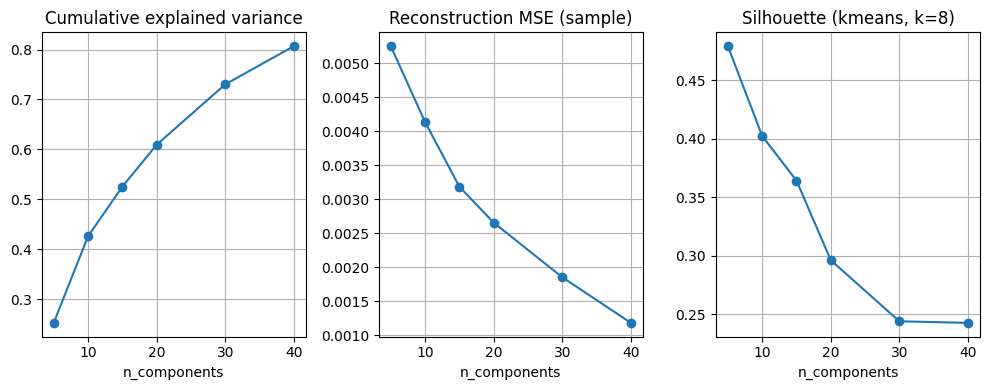

In [38]:
def eval_svd_k(X_tfidf, k_list=[5,10,20,30,50,80]):
    expl_var = []
    recon_err = []
    sil_scores = []

    for k in k_list:
        svd = TruncatedSVD(n_components=k, random_state=42)
        X_red = svd.fit_transform(X_tfidf)
        # cumulative explained variance
        cum_var = svd.explained_variance_ratio_.sum()
        expl_var.append(cum_var)

        # reconstruction error (on a small random sample if X large)
        try:
            # avoid dense conversion on very large data; sample rows if needed
            n_rows = X_tfidf.shape[0]
            sample_idx = np.random.choice(n_rows, size=min(1000, n_rows), replace=False)
            X_sample = X_tfidf[sample_idx]
            X_red_sample = X_red[sample_idx]
            X_approx = svd.inverse_transform(X_red_sample)
            mse = mean_squared_error(X_sample.toarray(), X_approx)
        except MemoryError:
            mse = np.nan
        recon_err.append(mse)

        # cluster silhouette (use kmeans on X_red)
        try:
            from sklearn.cluster import KMeans
            km = KMeans(n_clusters=8, random_state=42, n_init=10).fit(X_red)
            s = silhouette_score(X_red, km.labels_, metric='euclidean')
        except Exception:
            s = np.nan
        sil_scores.append(s)

        print(f"k={k:2d}  cum_explained_var={cum_var:.3f}  recon_mse={mse:.6f}  silhouette={s:.3f}")

    # plot diagnostics
    plt.figure(figsize=(10,4))
    plt.subplot(1,3,1)
    plt.plot(k_list, expl_var, marker='o'); plt.title('Cumulative explained variance')
    plt.xlabel('n_components'); plt.grid(True)
    plt.subplot(1,3,2)
    plt.plot(k_list, recon_err, marker='o'); plt.title('Reconstruction MSE (sample)')
    plt.xlabel('n_components'); plt.grid(True)
    plt.subplot(1,3,3)
    plt.plot(k_list, sil_scores, marker='o'); plt.title('Silhouette (kmeans, k=8)')
    plt.xlabel('n_components'); plt.grid(True)
    plt.tight_layout()
    return k_list, expl_var, recon_err, sil_scores

# Example call (adjust k_list if desired):
k_list, expl_var, recon_err, sil_scores = eval_svd_k(X_tfidf, k_list=[5,10,15,20,30,40])

#### Since clusters get less distinct about 30, I will choose n to be 20

In [ ]:
# scale components
X_reduced = StandardScaler().fit_transform(X_reduced)

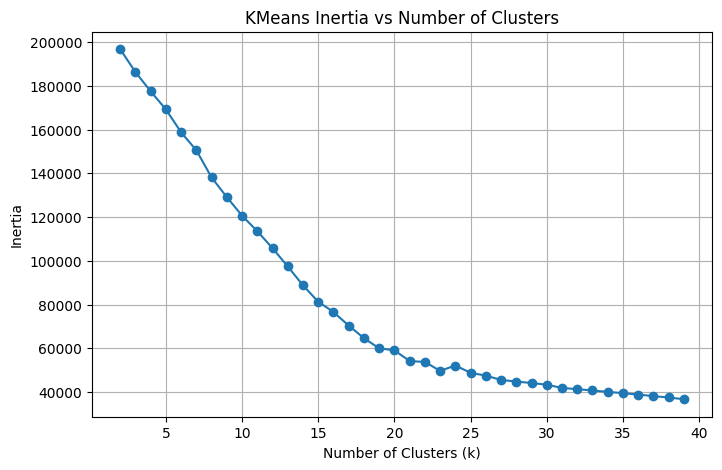

In [42]:
# Find best number of clusters using elbow method
inertia_list = []
k_values = range(2, 40)
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_reduced)
    inertia_list.append(km.inertia_)
# plot inertia vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_list, marker='o')
plt.title('KMeans Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


,silhouette,davies_bouldin,min_cluster,max_cluster
k,,,,
4,0.140218,1.703865,483,7984
5,0.168275,1.680140,483,7379
6,0.169814,2.062636,220,5441
7,0.205482,1.779801,220,5710
8,0.228649,1.808687,220,4623
9,0.241712,1.596603,286,5298
10,0.277996,1.382618,220,5418
11,0.285178,1.393271,220,4626
12,0.291929,1.419568,220,3965


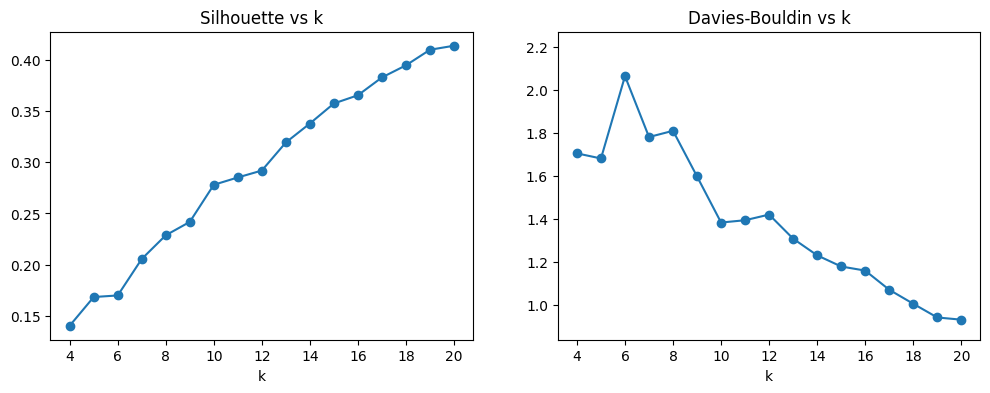

In [44]:
def cluster_diagnostics(X_reduced, k_min=2, k_max=20):
    rows = []
    for k in range(k_min, k_max+1):
        km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_reduced)
        labels = km.labels_
        sil = silhouette_score(X_reduced, labels) if k>1 else float('nan')
        db = davies_bouldin_score(X_reduced, labels) if k>1 else float('nan')
        sizes = pd.Series(labels).value_counts().sort_index().values
        rows.append({'k': k, 'silhouette': sil, 'davies_bouldin': db, 'min_cluster': sizes.min(), 'max_cluster': sizes.max()})
    df = pd.DataFrame(rows).set_index('k')
    display(df)
    # plots
    fig, axes = plt.subplots(1,2, figsize=(12,4))
    df['silhouette'].plot(ax=axes[0], marker='o', title='Silhouette vs k')
    df['davies_bouldin'].plot(ax=axes[1], marker='o', title='Davies-Bouldin vs k', ylim=(df['davies_bouldin'].min()*0.9, df['davies_bouldin'].max()*1.1))
    plt.show()
    return df

df_diag = cluster_diagnostics(X_reduced, k_min=4, k_max=20)

### Clustering: KMeans, DBSCAN, Birch

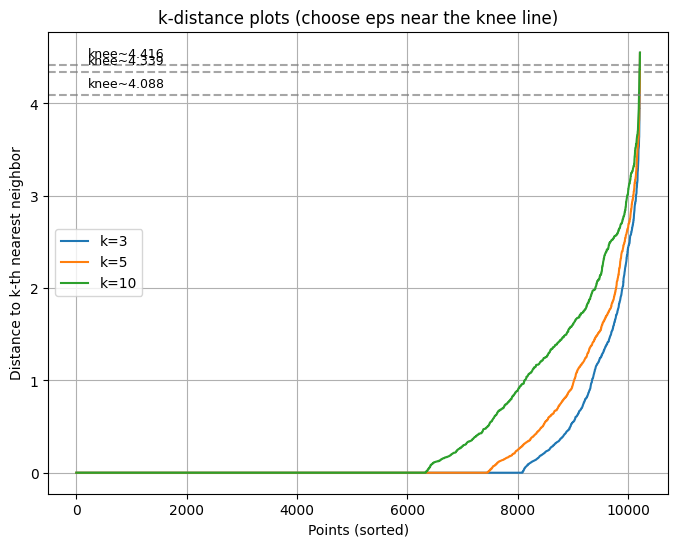

Suggested eps candidates per min_samples (k):
  k=3: knee=4.3389, 90pct=0.7494, 95pct=1.5310
  k=5: knee=4.4162, 90pct=1.2030, 95pct=1.8292
  k=10: knee=4.0881, 90pct=1.7512, 95pct=2.5224

Recommendation: try DBSCAN eps values around the knee and the 90-95% percentiles.
If DBSCAN produces mostly noise, increase eps; if it merges too much, decrease eps.


In [50]:
from sklearn.neighbors import NearestNeighbors

def kdistance_curve(X, k, sample_limit=None, plot=True):
    # Ensure X is numpy array (dense). If sparse, convert .toarray() on a sample only.
    Xn = np.asarray(X)
    n_samples = Xn.shape[0]
    # cap k to n_samples-1
    k = min(int(k), max(1, n_samples - 1))
    # kneighbors should ask for k+1 neighbors so we exclude the point itself (distance 0)
    n_neigh = k + 1
    if n_neigh >= n_samples:
        n_neigh = n_samples
    nbrs = NearestNeighbors(n_neighbors=n_neigh, n_jobs=-1).fit(Xn)
    distances, _ = nbrs.kneighbors(Xn)
    # distance to k-th neighbor excluding self is distances[:, k]
    kth_dist = distances[:, k] if distances.shape[1] > k else distances[:, -1]
    # sort ascending
    kth_sorted = np.sort(kth_dist)
    if plot:
        plt.plot(kth_sorted, label=f'k={k}')
    return kth_sorted

def find_knee(distances_sorted):
    # distances_sorted should be ascending
    # simple curvature heuristic: maximize second derivative (discrete)
    d1 = np.diff(distances_sorted)
    d2 = np.diff(d1)
    if len(d2) == 0:
        return None
    # index in distances_sorted corresponding to knee (shifted because of diffs)
    k_idx = np.argmax(np.abs(d2)) + 2
    if k_idx >= len(distances_sorted):
        k_idx = len(distances_sorted) - 1
    return distances_sorted[k_idx]

# Choose candidate min_samples values you want to inspect
min_samples_list = [3, 5, 10]   # adjust as you like

# Use X_reduced (already scaled in your notebook). If not scaled, uncomment scaler below.
X = X_reduced.copy()

# Optional: if X is very high-dimensional, you can reduce to 10 dims for neighbor computation
# from sklearn.decomposition import TruncatedSVD
# X = TruncatedSVD(n_components=10, random_state=42).fit_transform(X)

plt.figure(figsize=(8,6))
suggestions = {}
for k in min_samples_list:
    kth_sorted = kdistance_curve(X, k, plot=True)
    knee = find_knee(kth_sorted)
    # fallback suggestions from percentiles
    p90 = np.percentile(kth_sorted, 90)
    p95 = np.percentile(kth_sorted, 95)
    suggestions[k] = {'knee': float(knee) if knee is not None else None, 'p90': float(p90), 'p95': float(p95)}
    # mark knee on plot
    if knee is not None:
        plt.axhline(knee, color='grey', linestyle='--', alpha=0.7)
        plt.text(len(kth_sorted)*0.02, knee*1.02, f'knee~{knee:.3f}', fontsize=9)
plt.xlabel('Points (sorted)')
plt.ylabel('Distance to k-th nearest neighbor')
plt.title('k-distance plots (choose eps near the knee line)')
plt.grid(True)
plt.legend()
plt.show()

# Print suggested eps values
print("Suggested eps candidates per min_samples (k):")
for k, vals in suggestions.items():
    print(f"  k={k}: knee={vals['knee']:.4f}, 90pct={vals['p90']:.4f}, 95pct={vals['p95']:.4f}")

# Helpful reminder
print("\nRecommendation: try DBSCAN eps values around the knee and the 90-95% percentiles.")
print("If DBSCAN produces mostly noise, increase eps; if it merges too much, decrease eps.")


KMeans (k=8)
Clusters found: 8
Silhouette: 0.229
Davies-Bouldin: 1.809


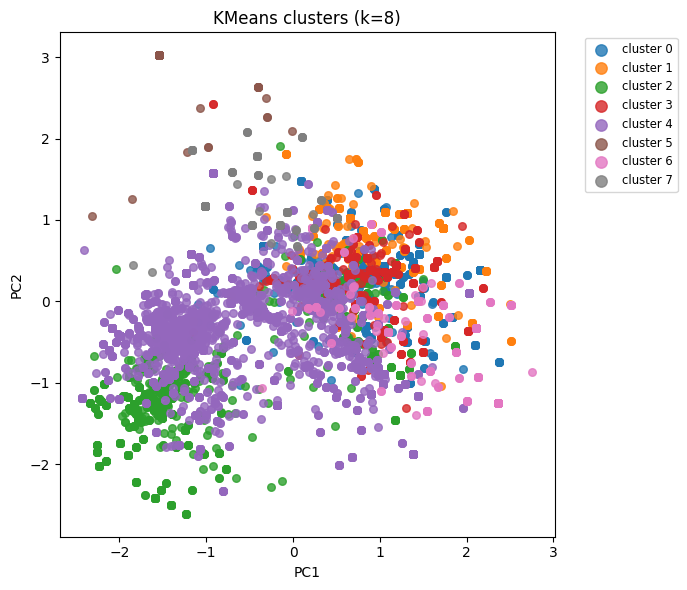

In [55]:
# KMeans clustering
k_clusters = 8

# fit
km = KMeans(n_clusters=k_clusters, random_state=42, n_init=10)
km_labels = km.fit_predict(X_reduced)

# save labels
df_preprocess['cluster_kmeans'] = km_labels

# 2D projection for plotting
pca2 = PCA(n_components=2, random_state=42)
X2 = pca2.fit_transform(X_reduced)

# metrics (KMeans has no noise)
sil_km = silhouette_score(X_reduced, km_labels) if len(np.unique(km_labels)) > 1 else np.nan
db_km  = davies_bouldin_score(X_reduced, km_labels) if len(np.unique(km_labels)) > 1 else np.nan

print(f"\nKMeans (k={k_clusters})")
print(f"Silhouette: {sil_km:.3f}")
print(f"Davies-Bouldin: {db_km:.3f}")

# plot
plt.figure(figsize=(7,6))
palette = sns.color_palette('tab10', n_colors=max(10, k_clusters))
for lab in sorted(np.unique(km_labels)):
    mask = km_labels == lab
    plt.scatter(X2[mask,0], X2[mask,1], s=30, alpha=0.8, color=palette[lab % len(palette)], label=f'cluster {lab}')
plt.title(f'KMeans clusters (k={k_clusters})')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', markerscale=1.5)
plt.tight_layout()
plt.show()


DBSCAN (eps=2.75, min_samples=40)
Unique labels (incl noise): [np.int64(-1), np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
Clusters (excl noise): 7, Noise points: 400
Silhouette (excl noise): 0.014
Davies-Bouldin (excl noise): 1.055


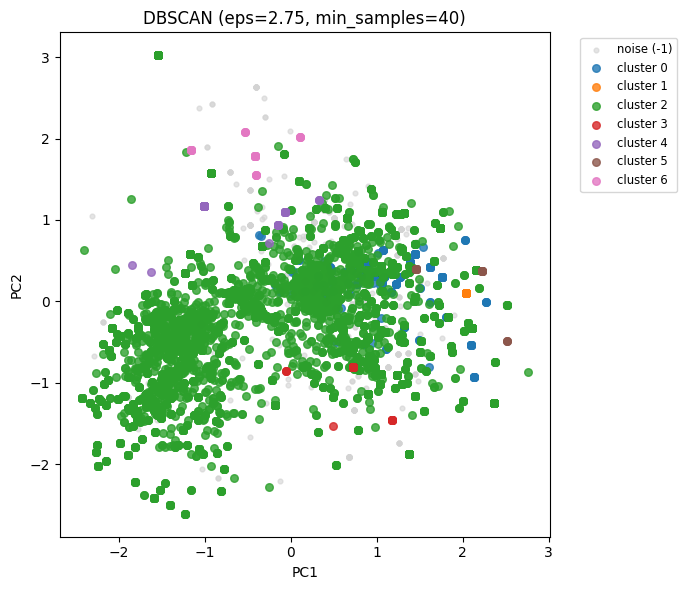

In [65]:
# DBSCAN clustering
db_eps = 2.75
db_min_samples = 40

# fit
db = DBSCAN(eps=db_eps, min_samples=db_min_samples, n_jobs=-1)
db_labels = db.fit_predict(X_reduced)

# save labels
df_preprocess['cluster_dbscan'] = db_labels

# 2D projection for plotting (re-use PCA; recompute for isolation if needed)
pca2 = PCA(n_components=2, random_state=42)
X2 = pca2.fit_transform(X_reduced)

# metrics: exclude noise (-1) when computing
mask = db_labels != -1
unique_nonnoise = np.unique(db_labels[mask]) if mask.sum() > 0 else np.array([])
n_clusters_excl_noise = len(unique_nonnoise)
n_noise = int(np.sum(db_labels == -1))

print(f"\nDBSCAN (eps={db_eps}, min_samples={db_min_samples})")
print(f"Unique labels (incl noise): {sorted(set(db_labels))}")
print(f"Clusters (excl noise): {n_clusters_excl_noise}, Noise points: {n_noise}")

if n_clusters_excl_noise >= 2 and mask.sum() > 0:
    sil_db = silhouette_score(X_reduced[mask], db_labels[mask])
    db_db  = davies_bouldin_score(X_reduced[mask], db_labels[mask])
    print(f"Silhouette (excl noise): {sil_db:.3f}")
    print(f"Davies-Bouldin (excl noise): {db_db:.3f}")
else:
    sil_db = np.nan
    db_db = np.nan
    print("Not enough clusters (>=2) excluding noise to compute silhouette / DB scores.")

# plot
plt.figure(figsize=(7,6))
palette = sns.color_palette('tab10', n_colors=12)
unique = sorted(set(db_labels))
for lab in unique:
    lab_mask = db_labels == lab
    if lab == -1:
        plt.scatter(X2[lab_mask,0], X2[lab_mask,1], s=12, c='lightgray', alpha=0.6, label='noise (-1)')
    else:
        plt.scatter(X2[lab_mask,0], X2[lab_mask,1], s=30, alpha=0.8, color=palette[lab % len(palette)], label=f'cluster {lab}')
plt.title(f'DBSCAN (eps={db_eps}, min_samples={db_min_samples})')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

In [71]:
# Birch clustering - hyperparameter tuning
best_score = -1
best_params = {}

for n_clusters in range(2, 12):  
    for threshold in np.arange(0.1, 2.0, 0.2):  # test various subcluster thresholds
        birch = Birch(n_clusters=n_clusters, threshold=threshold)
        clusters = birch.fit_predict(X_reduced)
        score = silhouette_score(X_reduced, clusters)

        print(f"n_clusters={n_clusters}, threshold={threshold:.1f}, Silhouette Score={score:.4f}")

        if score > best_score:
            best_score = score
            best_params = {
                'n_clusters': n_clusters,
                'threshold': threshold
            }

print("\nBest Params:", best_params)
print("Best Silhouette Score:", best_score)


n_clusters=2, threshold=0.1, Silhouette Score=0.1544
n_clusters=2, threshold=0.3, Silhouette Score=0.1481
n_clusters=2, threshold=0.5, Silhouette Score=0.1483
n_clusters=2, threshold=0.7, Silhouette Score=0.1561
n_clusters=2, threshold=0.9, Silhouette Score=0.1424
n_clusters=2, threshold=1.1, Silhouette Score=0.1371
n_clusters=2, threshold=1.3, Silhouette Score=0.1424
n_clusters=2, threshold=1.5, Silhouette Score=0.1544
n_clusters=2, threshold=1.7, Silhouette Score=0.1402
n_clusters=2, threshold=1.9, Silhouette Score=0.1426
n_clusters=3, threshold=0.1, Silhouette Score=0.1593
n_clusters=3, threshold=0.3, Silhouette Score=0.1586
n_clusters=3, threshold=0.5, Silhouette Score=0.1601
n_clusters=3, threshold=0.7, Silhouette Score=0.1591
n_clusters=3, threshold=0.9, Silhouette Score=0.1462
n_clusters=3, threshold=1.1, Silhouette Score=0.1540
n_clusters=3, threshold=1.3, Silhouette Score=0.1591
n_clusters=3, threshold=1.5, Silhouette Score=0.1540
n_clusters=3, threshold=1.7, Silhouette Score=


Birch (n_clusters=11)
Clusters found: 11
Silhouette: 0.242
Davies-Bouldin: 1.520


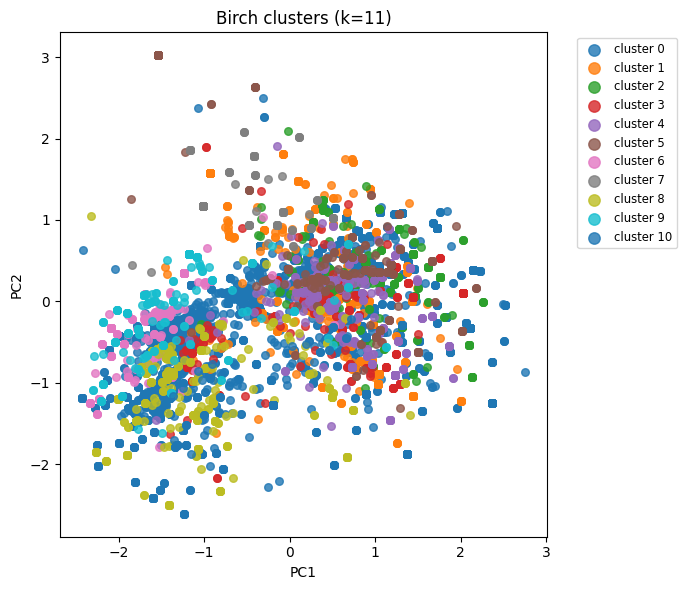

In [72]:
# Birch clustering
k_clusters = 11

# fit
br = Birch(n_clusters=k_clusters, threshold=1.7)
birch_labels = br.fit_predict(X_reduced)

# save labels
df_preprocess['cluster_birch'] = birch_labels

# 2D projection
pca2 = PCA(n_components=2, random_state=42)
X2 = pca2.fit_transform(X_reduced)

# metrics
sil_br = silhouette_score(X_reduced, birch_labels) if len(np.unique(birch_labels)) > 1 else np.nan
db_br  = davies_bouldin_score(X_reduced, birch_labels) if len(np.unique(birch_labels)) > 1 else np.nan

print(f"\nBirch (n_clusters={k_clusters})")
print(f"Clusters found: {len(np.unique(birch_labels))}")
print(f"Silhouette: {sil_br:.3f}")
print(f"Davies-Bouldin: {db_br:.3f}")

# plot
plt.figure(figsize=(7,6))
palette = sns.color_palette('tab10', n_colors=max(10, k_clusters))
for lab in sorted(np.unique(birch_labels)):
    mask = birch_labels == lab
    plt.scatter(X2[mask,0], X2[mask,1], s=30, alpha=0.8, color=palette[lab % len(palette)], label=f'cluster {lab}')
plt.title(f'Birch clusters (k={k_clusters})')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', markerscale=1.5)
plt.tight_layout()
plt.show()

In [73]:
# Summary table (silhouette & Davies-Bouldin) for the three algorithms

def safe_metrics(X, labels):
    # exclude DBSCAN noise (-1)
    mask = labels != -1
    # number of clusters excluding noise
    n_clusters = len(set(labels[mask])) if mask.sum() > 0 else 0
    if n_clusters >= 2 and mask.sum() > 0:
        sil = silhouette_score(X[mask], labels[mask])
        db = davies_bouldin_score(X[mask], labels[mask])
    else:
        sil, db = np.nan, np.nan
    return n_clusters, int(np.sum(labels==-1)), sil, db

rows = []
# collect labels; these variables are set in the three previous cells
algo_labels = [
    ('KMeans', km_labels if 'km_labels' in globals() else df_preprocess.get('cluster_kmeans').values),
    ('Birch', birch_labels if 'birch_labels' in globals() else df_preprocess.get('cluster_birch').values),
    ('DBSCAN', db_labels if 'db_labels' in globals() else df_preprocess.get('cluster_dbscan').values)
]

for name, labels in algo_labels:
    ncl, nnoise, sil, db = safe_metrics(X_reduced, np.array(labels))
    rows.append({'algorithm': name, 'n_clusters_excl_noise': ncl, 'n_noise': nnoise, 'silhouette': sil, 'davies_bouldin': db})

summary_df = pd.DataFrame(rows).set_index('algorithm')
print("\nClustering comparison:")
display(summary_df)


Clustering comparison:


,n_clusters_excl_noise,n_noise,silhouette,davies_bouldin
algorithm,,,,
KMeans,8,0,0.228649,1.808687
Birch,11,0,0.242316,1.519585
DBSCAN,7,400,0.013932,1.055431


Results Interpretation